# Preprocessing the Air Quality Dataset

## Load the dataset

In [302]:
import pandas as pd

file_path = '/content/AirQualityUCI.csv'
dataset = pd.read_csv(file_path, sep=';')

## Preliminary analysis of the data

### Initial exploration of the dataset:

#### Shape of the dataset

In [303]:
print(f"Shape: {dataset.shape}")

Shape: (9471, 17)


##### The dataset contains 9471 rows and 17 columns.

#### Columns of the dataset

In [304]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


##### The dataset includes pollutant readings (e.g., CO(GT), NMHC(GT)), sensor responses (e.g., PT08.S1(CO)), and environmental parameters (T, RH, AH).
##### Two unnamed columns (Unnamed: 15 and Unnamed: 16) are entirely empty.

#### Missing Values

In [305]:
dataset.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


##### Each column has 114 missing values, except for the two unnamed columns which are fully empty.

### Clean the dataset

#### Drop Irrelevant Columns

In [306]:
cleaned_dataset = dataset.drop(columns=["Unnamed: 15", "Unnamed: 16"])

##### Two irrelevant columns are now removed as they contain no meaningful data.

##### Each column has 114 missing values, except for the two unnamed columns which are fully empty.

#### Drop rows with missing values

##### Drop rows based on a threshold of non-missing values.

In [307]:
cleaned_dataset = cleaned_dataset.dropna(thresh=5)  # Keeps rows with at least 5 non-NA values

##### Dropping rows where critical columns have missing values.

In [308]:
cleaned_dataset = cleaned_dataset.dropna(subset=["Date", "Time"])

In [309]:
print(f"Rows removed: {len(dataset) - len(cleaned_dataset)}")

Rows removed: 114


##### Rename the Columns

In [310]:
rename_dict = {
    "CO(GT)": "CO_GT", "PT08.S1(CO)": "PT08_S1_CO",
    "NMHC(GT)": "NMHC_GT", "C6H6(GT)": "C6H6_GT",
    "PT08.S2(NMHC)": "PT08_S2_NMHC", "NOx(GT)": "NOx_GT",
    "PT08.S3(NOx)": "PT08_S3_NOx", "NO2(GT)" : "NO2_GT",
    "PT08.S4(NO2)": "PT08_S4_NO2", "PT08.S5(O3)": "PT08_S5_O3"


    # Add other mappings as needed
}
cleaned_dataset.rename(columns=rename_dict, inplace=True)

##### Removing 114 rows is a significant but reasonable step if those rows were entirely empty. It ensures the dataset is clean without losing potentially useful information.

#### Fix Object Columns

##### Replace commas with periods and convert these object columns to numeric (float).

In [311]:
# Replace commas with periods and convert to numeric
for col in ["CO_GT", "C6H6_GT", "T", "RH", "AH"]:
    cleaned_dataset[col] = cleaned_dataset[col].str.replace(",", ".").astype(float)

#### Standardize the Date and Time Format


In [312]:
# Replace any dashes with slashes in the Date column
cleaned_dataset["Date"] = cleaned_dataset["Date"].str.replace("-", "/")

# Replace any dots (.) with colons (:) in the Time column
cleaned_dataset["Time"] = cleaned_dataset["Time"].str.replace(".", ":")

# Recreate the Datetime column
cleaned_dataset["Datetime"] = pd.to_datetime(
    cleaned_dataset["Date"] + " " + cleaned_dataset["Time"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce",
    dayfirst=True,
)

cleaned_dataset = cleaned_dataset.drop(columns=["Date", "Time"])

In [313]:
print(cleaned_dataset.shape)
print(cleaned_dataset.info())
cleaned_dataset.head()

(9357, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CO_GT         9357 non-null   float64       
 1   PT08_S1_CO    9357 non-null   float64       
 2   NMHC_GT       9357 non-null   float64       
 3   C6H6_GT       9357 non-null   float64       
 4   PT08_S2_NMHC  9357 non-null   float64       
 5   NOx_GT        9357 non-null   float64       
 6   PT08_S3_NOx   9357 non-null   float64       
 7   NO2_GT        9357 non-null   float64       
 8   PT08_S4_NO2   9357 non-null   float64       
 9   PT08_S5_O3    9357 non-null   float64       
 10  T             9357 non-null   float64       
 11  RH            9357 non-null   float64       
 12  AH            9357 non-null   float64       
 13  Datetime      9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB
None


,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


### Summary Statistics

In [314]:
print(cleaned_dataset.describe())

             CO_GT   PT08_S1_CO      NMHC_GT      C6H6_GT  PT08_S2_NMHC  \
count  9357.000000  9357.000000  9357.000000  9357.000000   9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683    894.595276   
min    -200.000000  -200.000000  -200.000000  -200.000000   -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000    711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000    895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000   1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000   2214.000000   
std      77.657170   329.832710   139.789093    41.380206    342.333252   

            NOx_GT  PT08_S3_NOx       NO2_GT  PT08_S4_NO2   PT08_S5_O3  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    168.616971   794.990168    58.148873  1391.479641   975.072032   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%      50.000000   637.000

In [315]:
# Replace invalid values (-200) with NaN
columns_with_invalid = ["CO_GT", "PT08_S1_CO", "NMHC_GT", "C6H6_GT", "PT08_S2_NMHC", "NOx_GT",
                        "PT08_S3_NOx", "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "T", "RH", "AH"]

cleaned_dataset[columns_with_invalid] = cleaned_dataset[columns_with_invalid].replace(-200, pd.NA)

# Verify changes
print(cleaned_dataset.isnull().sum())

CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
NOx_GT          1639
PT08_S3_NOx      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
Datetime           0
dtype: int64


### Handle Missing Values

In [316]:
# Drop NMHC_GT due to excessive missing values
cleaned_dataset = cleaned_dataset.drop(columns=["NMHC_GT"])


# Impute missing values with the median for numerical columns
columns_to_impute = ["CO_GT", "PT08_S1_CO", "C6H6_GT", "PT08_S2_NMHC", "NOx_GT",
                     "PT08_S3_NOx", "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "T", "RH", "AH"]
pd.set_option('future.no_silent_downcasting', True)
cleaned_dataset[columns_to_impute] = cleaned_dataset[columns_to_impute].fillna(cleaned_dataset[columns_to_impute].median())
cleaned_dataset = cleaned_dataset.infer_objects()
# Verify changes
print(cleaned_dataset.isnull().sum())

CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOx_GT          0
PT08_S3_NOx     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
Datetime        0
dtype: int64


In [317]:
print(cleaned_dataset.describe())

             CO_GT   PT08_S1_CO      C6H6_GT  PT08_S2_NMHC       NOx_GT  \
count  9357.000000  9357.000000  9357.000000   9357.000000  9357.000000   
mean      2.089302  1098.392433    10.009447    937.973923   235.178903   
min       0.100000   647.000000     0.100000    383.000000     2.000000   
25%       1.200000   941.000000     4.600000    743.000000   112.000000   
50%       1.800000  1063.000000     8.200000    909.000000   180.000000   
75%       2.600000  1221.000000    13.600000   1105.000000   284.000000   
max      11.900000  2040.000000    63.700000   2214.000000  1479.000000   
std       1.323024   212.911465     7.311771    261.625561   195.091025   

       PT08_S3_NOx       NO2_GT  PT08_S4_NO2   PT08_S5_O3            T  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    834.339959   112.373303  1456.528054  1020.562894    18.297574   
min     322.000000     2.000000   551.000000   221.000000    -1.900000   
25%     666.000000    86.000

#### Check how many measurements are available per day or month:

In [318]:
cleaned_dataset["YearMonth"] = cleaned_dataset["Datetime"].dt.to_period("M")
print(cleaned_dataset["YearMonth"].value_counts())


YearMonth
2004-07    744
2004-05    744
2004-08    744
2005-03    744
2004-12    744
2004-10    744
2005-01    744
2004-11    720
2004-04    720
2004-06    720
2004-09    720
2005-02    672
2004-03    510
2005-04     87
Freq: M, Name: count, dtype: int64


### Data Visualization

#### Visualizing Distributions with Histograms

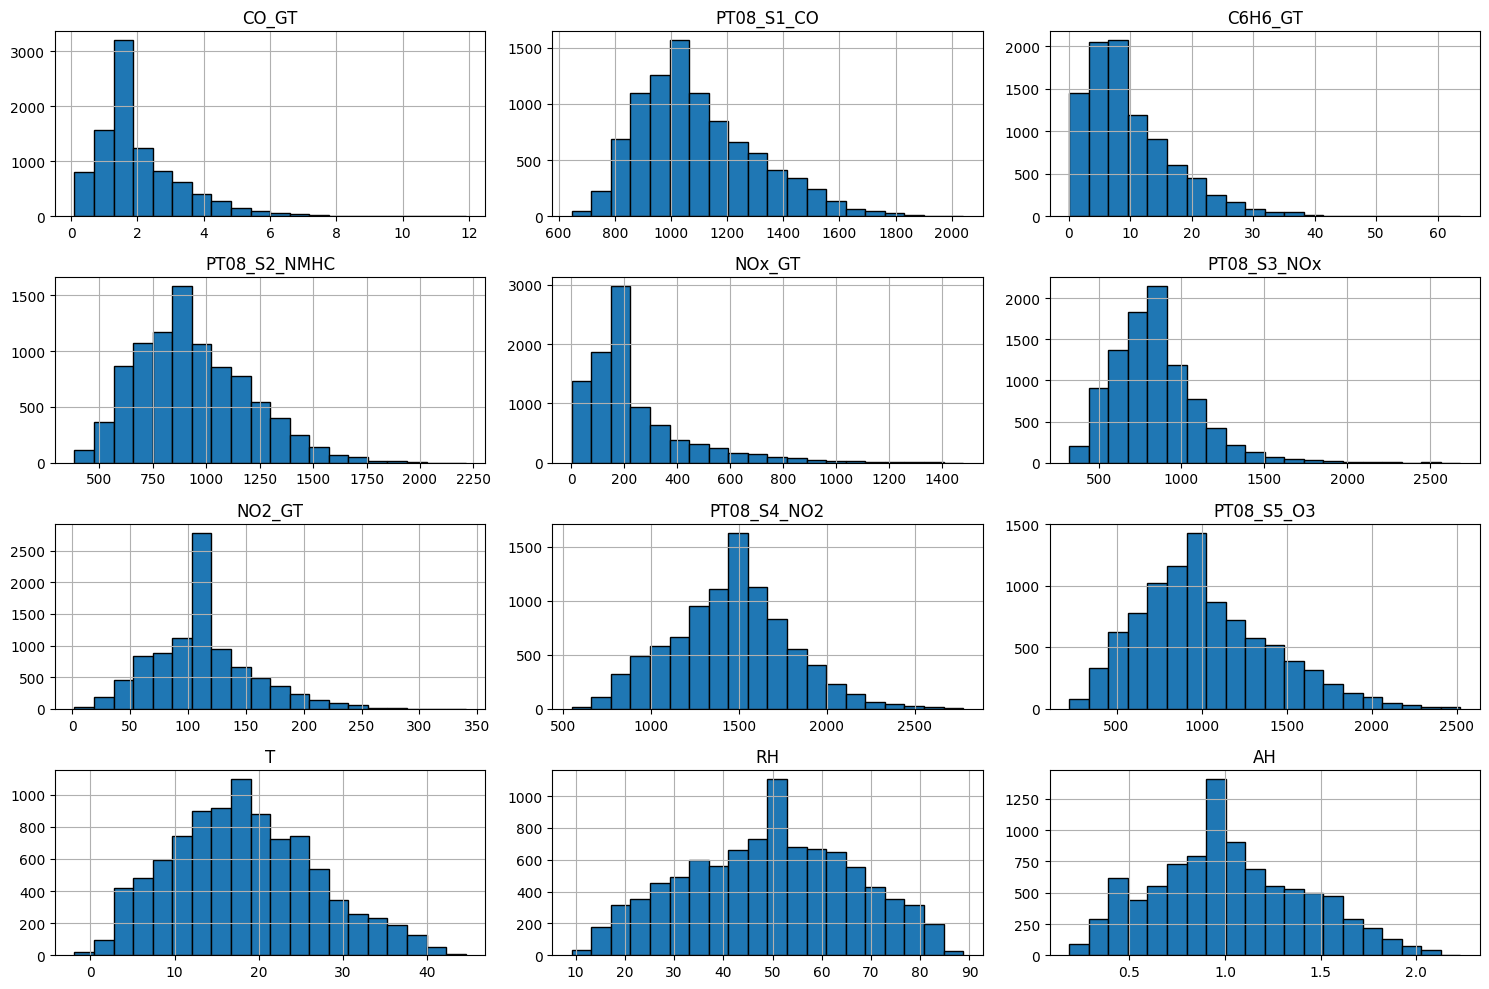

In [319]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
cleaned_dataset.drop(columns=["Datetime"]).hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


#### Correlation Heatmap

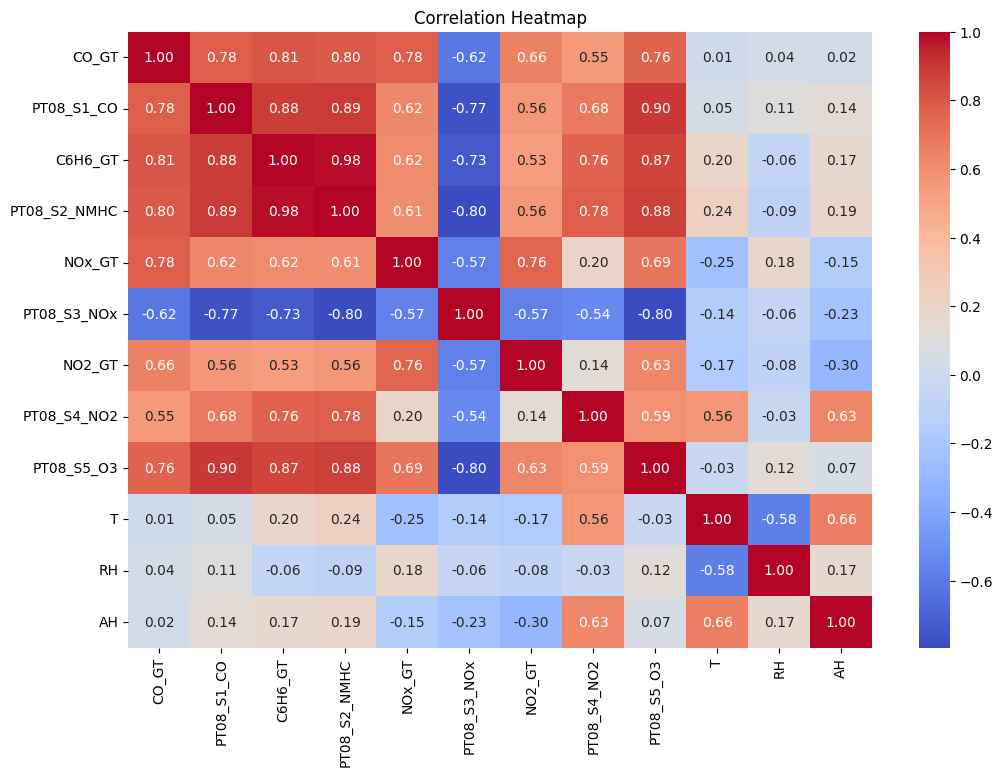

In [320]:
import seaborn as sns

# Drop non-numeric columns before calculating correlation
numeric_dataset = cleaned_dataset.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### Scatter Plot Visualization

##### To explore relationships between highly correlated variables, we can start with scatter plots.

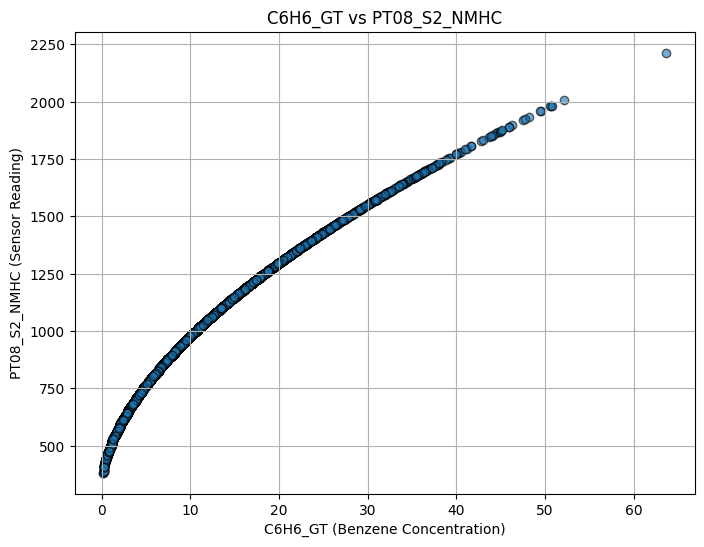

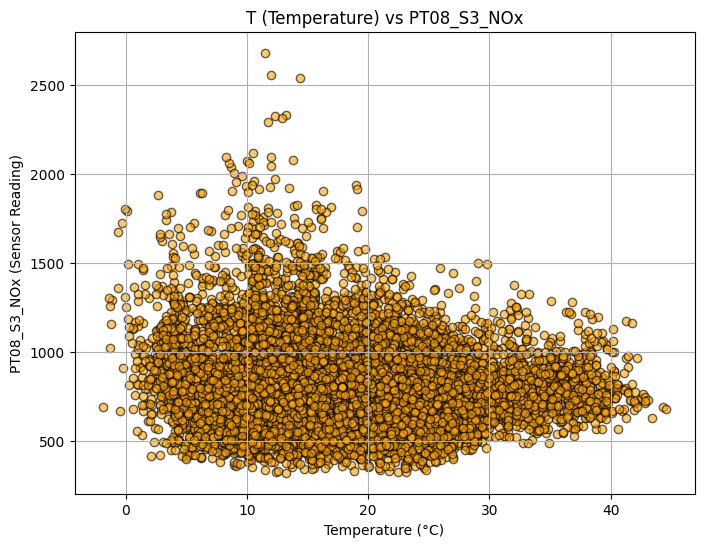

In [321]:
import matplotlib.pyplot as plt

# Scatter plot for a strong positive correlation
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_dataset["C6H6_GT"], cleaned_dataset["PT08_S2_NMHC"], alpha=0.6, edgecolor='k')
plt.title("C6H6_GT vs PT08_S2_NMHC")
plt.xlabel("C6H6_GT (Benzene Concentration)")
plt.ylabel("PT08_S2_NMHC (Sensor Reading)")
plt.grid(True)
plt.show()

# Scatter plot for a strong negative correlation
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_dataset["T"], cleaned_dataset["PT08_S3_NOx"], alpha=0.6, edgecolor='k', color='orange')
plt.title("T (Temperature) vs PT08_S3_NOx")
plt.xlabel("Temperature (°C)")
plt.ylabel("PT08_S3_NOx (Sensor Reading)")
plt.grid(True)
plt.show()


##### Analyzing Relationships Between Pollutants

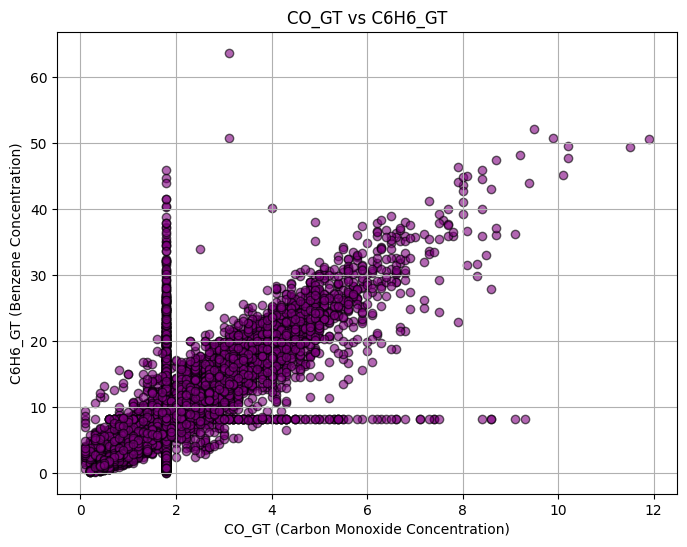

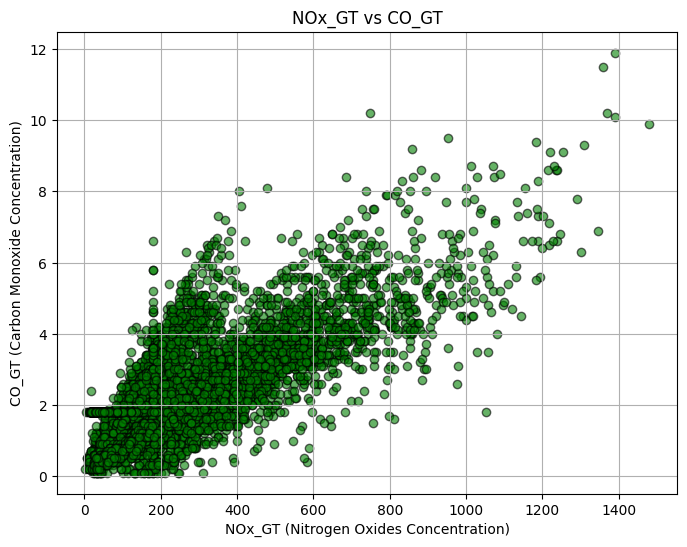

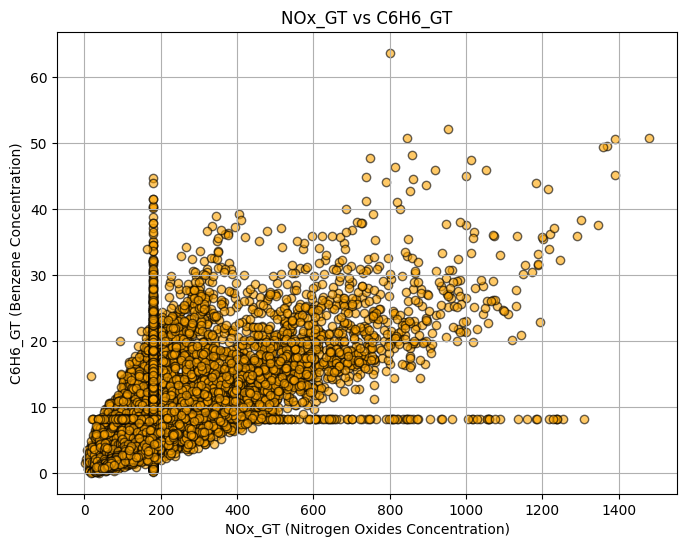

In [322]:
# Scatter plot: CO_GT vs C6H6_GT
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_dataset["CO_GT"], cleaned_dataset["C6H6_GT"], alpha=0.6, edgecolor='k', color="purple")
plt.title("CO_GT vs C6H6_GT")
plt.xlabel("CO_GT (Carbon Monoxide Concentration)")
plt.ylabel("C6H6_GT (Benzene Concentration)")
plt.grid(True)
plt.show()

# Scatter plot: NOx_GT vs CO_GT
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_dataset["NOx_GT"], cleaned_dataset["CO_GT"], alpha=0.6, edgecolor='k', color="green")
plt.title("NOx_GT vs CO_GT")
plt.xlabel("NOx_GT (Nitrogen Oxides Concentration)")
plt.ylabel("CO_GT (Carbon Monoxide Concentration)")
plt.grid(True)
plt.show()

# Scatter plot: NOx_GT vs C6H6_GT
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_dataset["NOx_GT"], cleaned_dataset["C6H6_GT"], alpha=0.6, edgecolor='k', color="orange")
plt.title("NOx_GT vs C6H6_GT")
plt.xlabel("NOx_GT (Nitrogen Oxides Concentration)")
plt.ylabel("C6H6_GT (Benzene Concentration)")
plt.grid(True)
plt.show()


##### Correlation Analysis: Sensors ↔ Pollutants

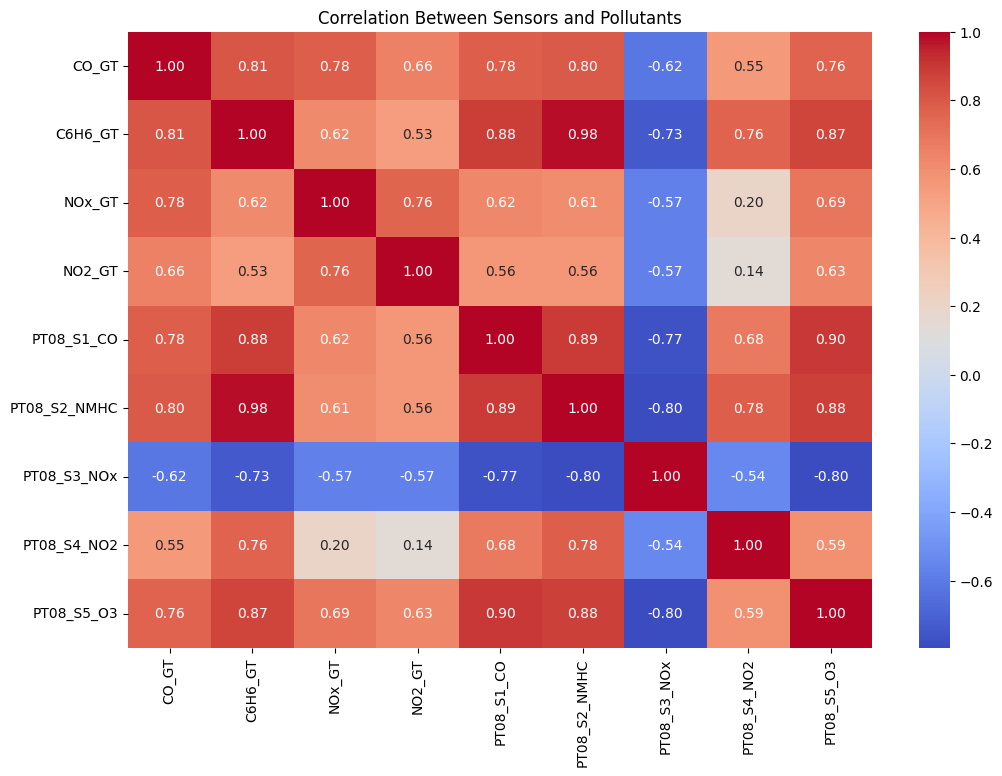

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Focus on pollutants and sensor columns
sensors_pollutants = [
    "CO_GT", "C6H6_GT", "NOx_GT", "NO2_GT",
    "PT08_S1_CO", "PT08_S2_NMHC", "PT08_S3_NOx", "PT08_S4_NO2", "PT08_S5_O3"
]

# Compute correlation matrix
correlation_matrix = cleaned_dataset[sensors_pollutants].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Sensors and Pollutants")
plt.show()


##### Environmental Factors ↔ Pollutants

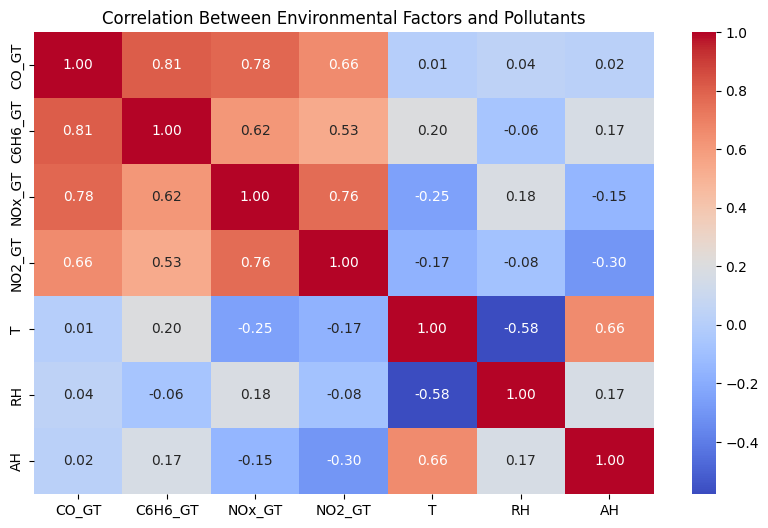

In [324]:
# Focus on pollutants and environmental factors
environment_pollutants = ["CO_GT", "C6H6_GT", "NOx_GT", "NO2_GT", "T", "RH", "AH"]

# Compute correlation matrix
correlation_matrix = cleaned_dataset[environment_pollutants].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Environmental Factors and Pollutants")
plt.show()


##### Sensors ↔ Environmental Factors

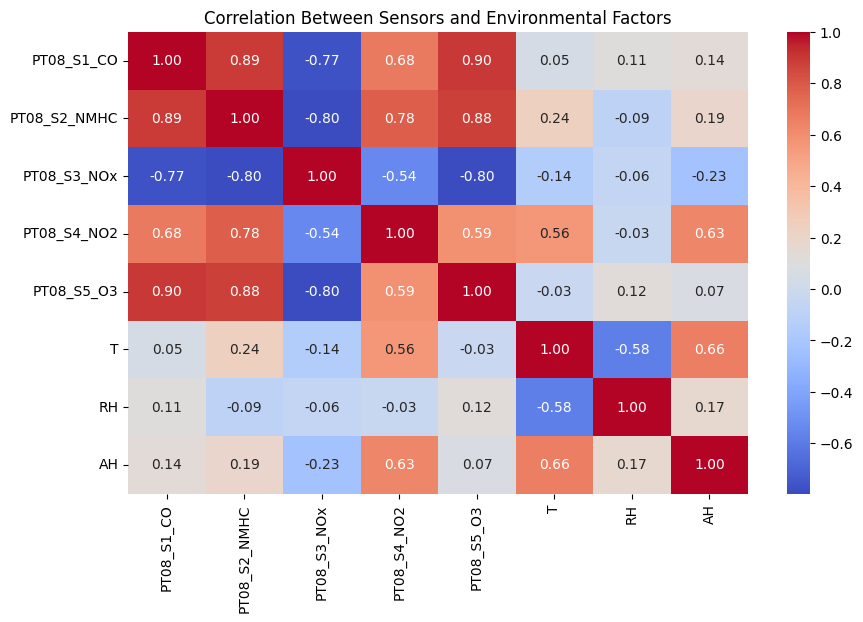

In [325]:
# Focus on sensors and environmental factors
sensors_environment = [
    "PT08_S1_CO", "PT08_S2_NMHC", "PT08_S3_NOx", "PT08_S4_NO2", "PT08_S5_O3",
    "T", "RH", "AH"
]

# Compute correlation matrix
correlation_matrix = cleaned_dataset[sensors_environment].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Sensors and Environmental Factors")
plt.show()


##### Scatter Plots for Key Relationships

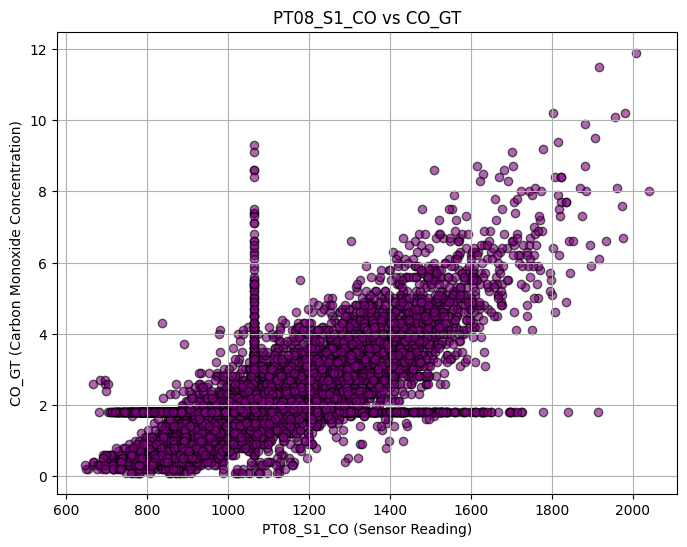

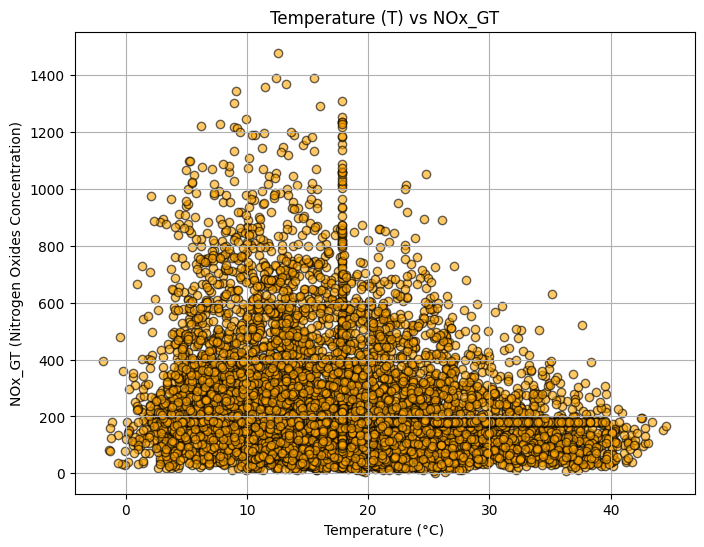

In [326]:
import matplotlib.pyplot as plt

# Scatter plot: PT08_S1_CO vs CO_GT
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_dataset["PT08_S1_CO"], cleaned_dataset["CO_GT"], alpha=0.6, edgecolor="k", color="purple")
plt.title("PT08_S1_CO vs CO_GT")
plt.xlabel("PT08_S1_CO (Sensor Reading)")
plt.ylabel("CO_GT (Carbon Monoxide Concentration)")
plt.grid(True)
plt.show()

# Scatter plot: T (Temperature) vs NOx_GT
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_dataset["T"], cleaned_dataset["NOx_GT"], alpha=0.6, edgecolor="k", color="orange")
plt.title("Temperature (T) vs NOx_GT")
plt.xlabel("Temperature (°C)")
plt.ylabel("NOx_GT (Nitrogen Oxides Concentration)")
plt.grid(True)
plt.show()


### Time Series Analysis

#### Resample Data to Daily Averages

In [327]:
# Set Datetime as index
time_series_dataset = cleaned_dataset.set_index("Datetime")

# Resample to daily averages
daily_averages = time_series_dataset.resample("D").mean()
print(daily_averages.head())


               CO_GT   PT08_S1_CO    C6H6_GT  PT08_S2_NMHC   NOx_GT  \
Datetime                                                              
2004-03-10  1.966667  1316.500000   8.450000    912.333333  132.000   
2004-03-11  2.220833  1244.166667   7.979167    851.958333  145.875   
2004-03-12  2.720833  1281.666667  12.129167   1008.291667  174.250   
2004-03-13  2.658333  1330.666667  10.916667    992.833333  184.250   
2004-03-14  2.441667  1361.125000   9.637500    943.916667  148.000   

            PT08_S3_NOx      NO2_GT  PT08_S4_NO2   PT08_S5_O3          T  \
Datetime                                                                   
2004-03-10  1167.333333  108.833333  1545.500000  1096.000000  12.033333   
2004-03-11  1277.250000  100.250000  1522.833333   885.250000   9.837500   
2004-03-12  1101.875000  115.666667  1627.291667  1084.375000  11.287500   
2004-03-13   993.208333  118.458333  1595.791667  1245.916667  12.866667   
2004-03-14  1001.291667  110.333333  1602.3750

#### Plot Time-Series for Pollutants

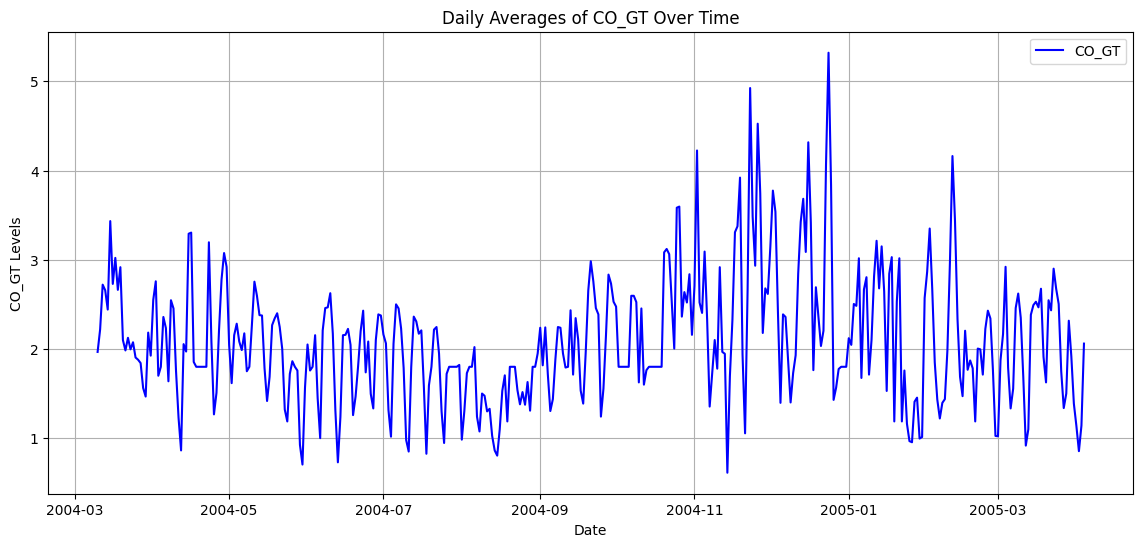

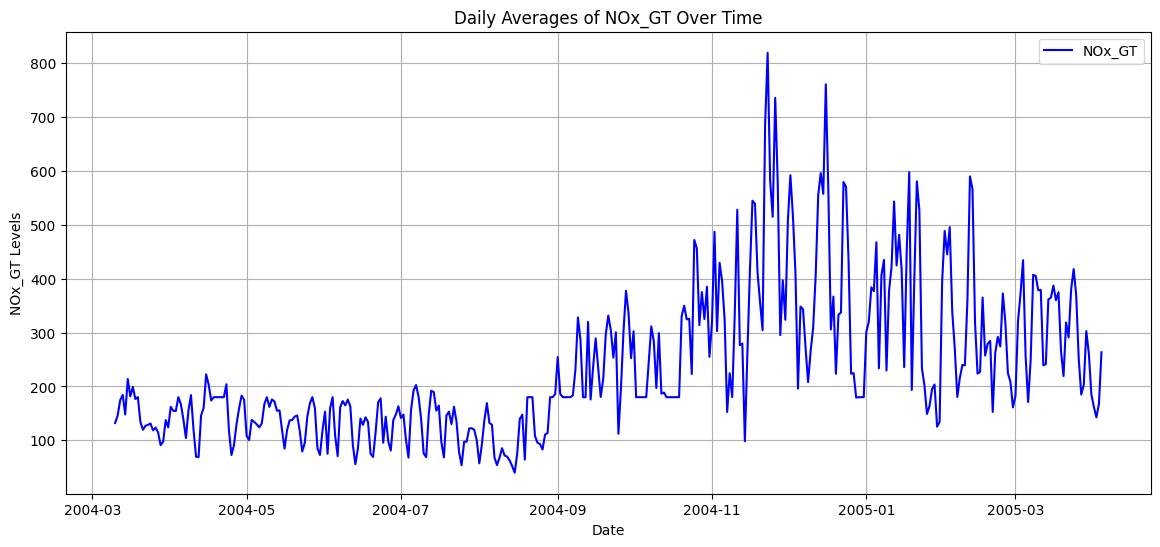

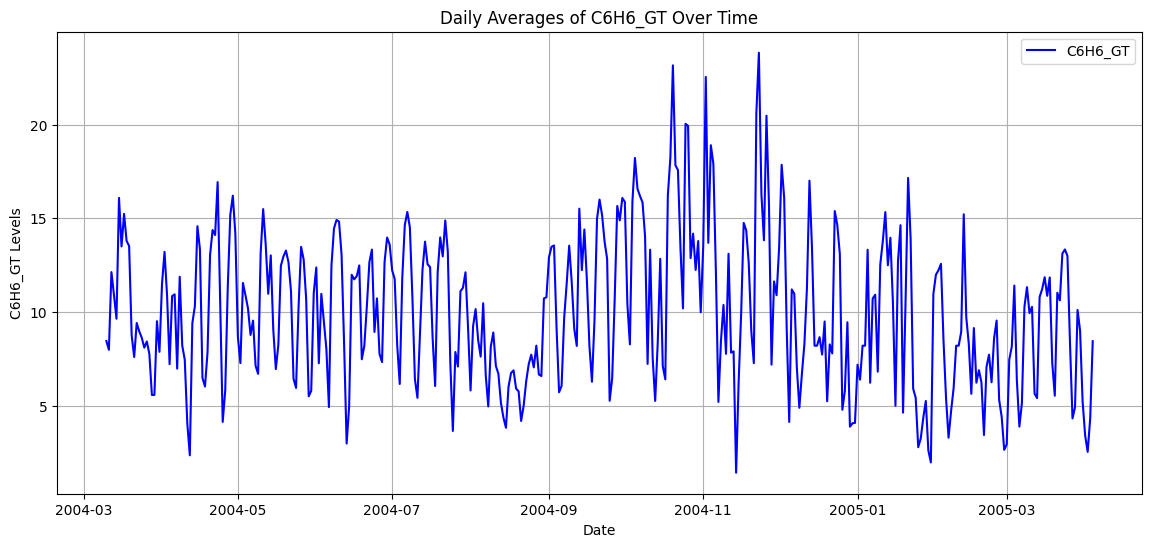

In [328]:
# Time-series plot for key pollutants
pollutants = ["CO_GT", "NOx_GT", "C6H6_GT"]

for pollutant in pollutants:
    plt.figure(figsize=(14, 6))
    plt.plot(daily_averages.index, daily_averages[pollutant], label=pollutant, color="blue")
    plt.title(f"Daily Averages of {pollutant} Over Time")
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant} Levels")
    plt.legend()
    plt.grid(True)
    plt.show()



#### Analyze Seasonal Trends


Monthly Averages Table:
           CO_GT  NOx_GT  C6H6_GT
January     2.10  342.06     8.96
February    2.09  309.01     7.58
March       2.13  241.52     9.22
April       2.05  155.60     9.66
May         1.91  133.49    10.18
June        1.89  127.78    10.47
July        1.79  129.04    10.60
August      1.47  109.74     7.07
September   2.08  242.02    11.47
October     2.29  262.19    13.52
November    2.64  403.16    12.51
December    2.62  378.24     9.36


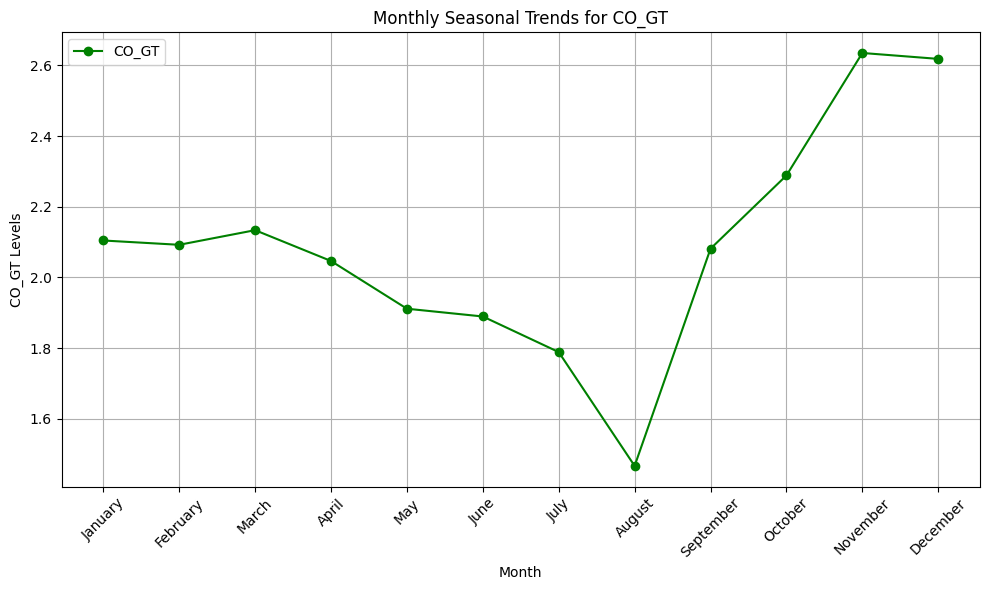

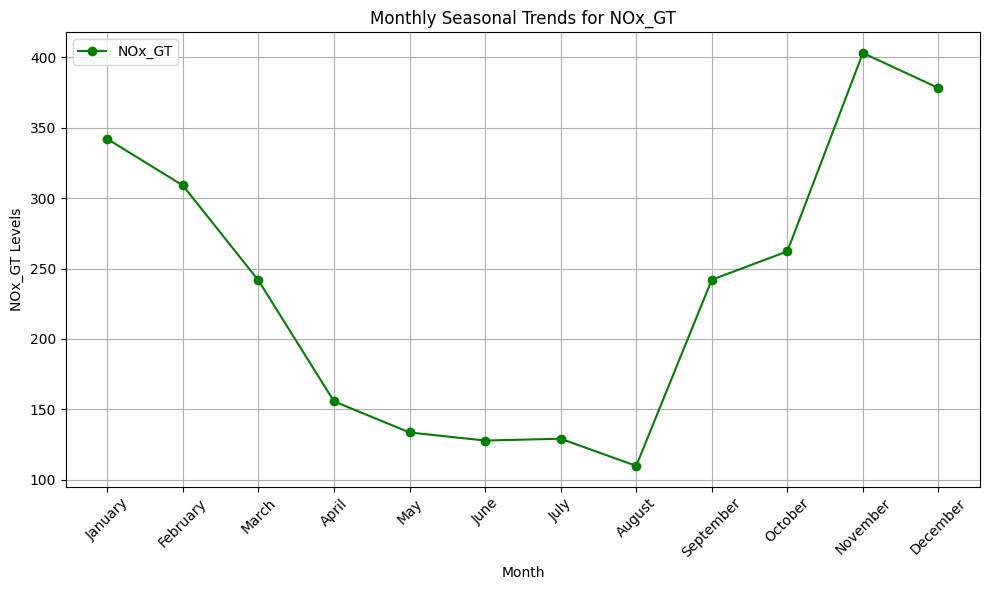

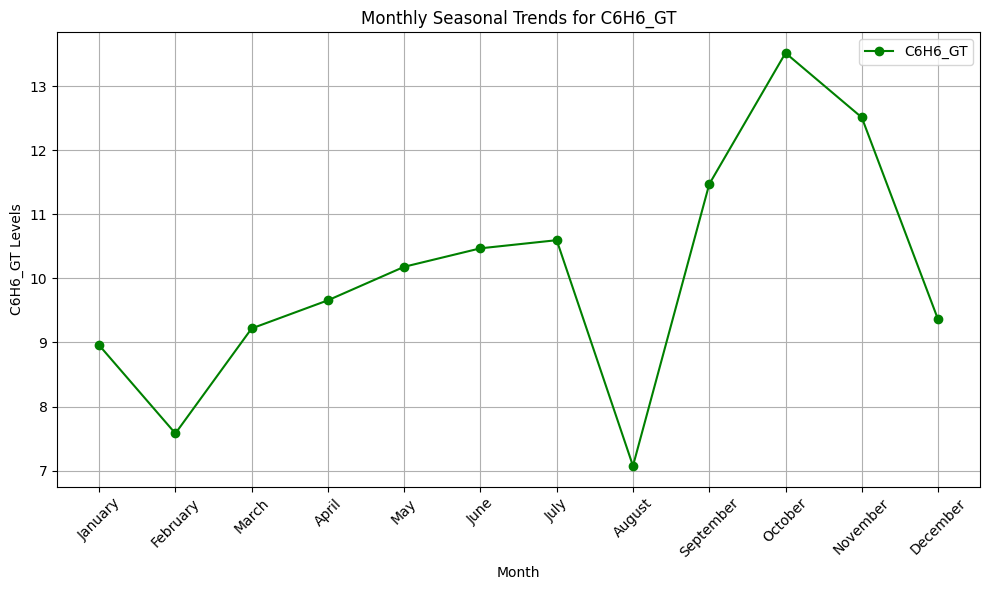

In [329]:
import calendar
import matplotlib.pyplot as plt

# Extract day, month, and hour information
time_series_dataset["Month"] = time_series_dataset.index.month
time_series_dataset["Hour"] = time_series_dataset.index.hour

# Group by Month to analyze seasonal trends
monthly_trends = time_series_dataset.groupby("Month").mean()

# Replace month numbers with month names
monthly_trends.index = [calendar.month_name[month] for month in monthly_trends.index]

# Print the table of monthly averages for pollutants
pollutants = ["CO_GT", "NOx_GT", "C6H6_GT"]  # Define pollutants of interest
print("\nMonthly Averages Table:")
print(monthly_trends[pollutants].to_string(float_format="%.2f"))

# Seasonal trends for each pollutant separately
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    plt.plot(
        monthly_trends.index,
        monthly_trends[pollutant],
        label=pollutant,
        color="green",
        marker="o"
    )
    plt.title(f"Monthly Seasonal Trends for {pollutant}")
    plt.xlabel("Month")
    plt.ylabel(f"{pollutant} Levels")
    plt.xticks(rotation=45)  # Rotate month names for better visibility
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ensure layout fits well
    plt.show()


### Derived Features for Enhanced Analysis

#### Pollutant Ratios

In [330]:
time_series_dataset['CO_NOx_Ratio'] = time_series_dataset['CO_GT'] / time_series_dataset['NOx_GT']
time_series_dataset['C6H6_CO_Ratio'] = time_series_dataset['C6H6_GT'] / time_series_dataset['CO_GT']

#### Lagged Features

In [331]:
time_series_dataset['CO_GT_Lag1'] = time_series_dataset['CO_GT'].shift(1)
time_series_dataset['NOx_GT_Lag1'] = time_series_dataset['NOx_GT'].shift(1)

#### Feature Extraction and Transformation for Temporal and Numerical Data

In [332]:
# Extract additional features from Datetime
cleaned_dataset["Year"] = cleaned_dataset["Datetime"].dt.year
cleaned_dataset["Month"] = cleaned_dataset["Datetime"].dt.month
cleaned_dataset["Day"] = cleaned_dataset["Datetime"].dt.day
cleaned_dataset["DayOfWeek"] = cleaned_dataset["Datetime"].dt.dayofweek  # Monday=0, Sunday=6
cleaned_dataset["Hour"] = cleaned_dataset["Datetime"].dt.hour

# Add cyclical encoding for time-based features
cleaned_dataset["Hour_sin"] = np.sin(2 * np.pi * cleaned_dataset["Hour"] / 24)
cleaned_dataset["Hour_cos"] = np.cos(2 * np.pi * cleaned_dataset["Hour"] / 24)
cleaned_dataset["DayOfWeek_sin"] = np.sin(2 * np.pi * cleaned_dataset["DayOfWeek"] / 7)
cleaned_dataset["DayOfWeek_cos"] = np.cos(2 * np.pi * cleaned_dataset["DayOfWeek"] / 7)

# Drop raw Hour and DayOfWeek if not needed
cleaned_dataset = cleaned_dataset.drop(columns=["Hour", "DayOfWeek"], errors='ignore')

# Step 3: Scale the features for modeling

# Select numerical columns
numerical_features = cleaned_dataset.select_dtypes(include=["float64", "int64"]).columns

# Initialize scaler and scale the cleaned_dataset
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(cleaned_dataset[numerical_features])

# Convert scaled data back to a DataFrame
dataset_scaled = pd.DataFrame(dataset_scaled, columns=numerical_features, index=cleaned_dataset.index)


## Standardizing the Dataset

In [333]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features for normalization
numerical_features = dataset_scaled.select_dtypes(include=["float64", "int64"]).columns

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying the scaler to numerical features
normalized_data = scaler.fit_transform(dataset_scaled[numerical_features])

# Converting back to a DataFrame
normalized_dataset = pd.DataFrame(normalized_data, columns=numerical_features, index=dataset_scaled.index)

# Display the first few rows of the normalized dataset
print(normalized_dataset.head())


      CO_GT  PT08_S1_CO   C6H6_GT  PT08_S2_NMHC    NOx_GT  PT08_S3_NOx  \
0  0.386029    1.228781  0.258577      0.412925 -0.354617     0.880318   
1 -0.067502    0.909382 -0.083356      0.065082 -0.677560     1.348952   
2  0.083675    1.426057 -0.138065      0.003922 -0.534030     1.213922   
3  0.083675    1.303934 -0.110711      0.038324 -0.323861     1.023291   
4 -0.369856    0.815441 -0.479998     -0.389791 -0.534030     1.472068   

     NO2_GT  PT08_S4_NO2  PT08_S5_O3         T        RH        AH  Hour_sin  \
0  0.014261     0.693887    0.633214 -0.542585 -0.020532 -0.673353 -1.414701   
1 -0.463597     0.301964   -0.124277 -0.577236 -0.091228 -0.754948 -1.366509   
2  0.037016     0.290176    0.136750 -0.738941  0.279927 -0.692552 -1.225218   
3  0.219057     0.375633    0.466873 -0.842894  0.633408 -0.600347 -1.000457   
4  0.082526     0.098635    0.228878 -0.819793  0.609842 -0.595042 -0.707542   

   Hour_cos  DayOfWeek_sin  DayOfWeek_cos  
0 -0.000222       1.385195    

## Dimensionality Reduction

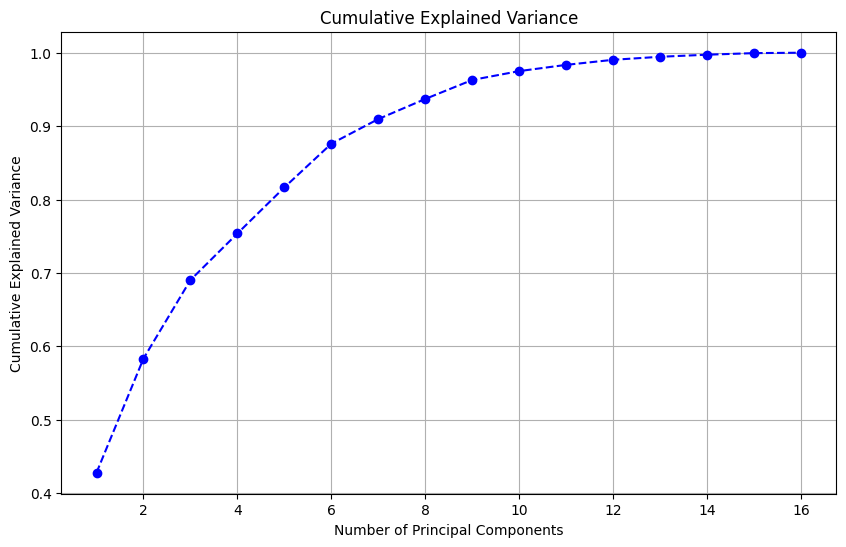

Explained Variance Ratio:
   Component  Explained Variance
0        PC1            0.427758
1        PC2            0.155529
2        PC3            0.106990
3        PC4            0.063445
4        PC5            0.062793
5        PC6            0.059553
6        PC7            0.033550
7        PC8            0.027405
8        PC9            0.025878
9       PC10            0.012059
10      PC11            0.008489
11      PC12            0.006914
12      PC13            0.004120
13      PC14            0.002808
14      PC15            0.002174
15      PC16            0.000536

Feature Contributions to Principal Components:
        CO_GT  PT08_S1_CO   C6H6_GT  PT08_S2_NMHC    NOx_GT  PT08_S3_NOx  \
PC1  0.334014    0.354273  0.362529      0.369178  0.281106    -0.321190   
PC2 -0.109732   -0.028801  0.057040      0.076558 -0.307300    -0.010736   
PC3 -0.016779    0.090122  0.014899     -0.009488 -0.031190    -0.052660   
PC4  0.051236    0.007187 -0.065337     -0.035947 -0.024302  

In [334]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(normalized_dataset)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(
    data=pca_components,
    columns=[f"PC{i+1}" for i in range(pca_components.shape[1])]
)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance) + 1),
    np.cumsum(explained_variance),
    marker='o',
    linestyle='--',
    color='b'
)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Display the contribution of each feature to the first few components
loading_matrix = pd.DataFrame(
    data=pca.components_,
    columns=normalized_dataset.columns,
    index=[f"PC{i+1}" for i in range(len(pca.components_))]
)

print("Explained Variance Ratio:")
print(pd.DataFrame({"Component": [f"PC{i+1}" for i in range(len(explained_variance))],
                    "Explained Variance": explained_variance}))

print("\nFeature Contributions to Principal Components:")
print(loading_matrix.head())


### Machine Learning Algorithms

#### Random Forest


In [335]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


##### Prepare dataset

In [336]:
from sklearn.model_selection import train_test_split

# Define input features (sensor responses)
X = normalized_dataset.drop(columns=["CO_GT", "C6H6_GT", "NOx_GT", "NO2_GT"], errors='ignore')

# Define target variables (true pollutant concentrations)
y = normalized_dataset[["CO_GT", "C6H6_GT", "NOx_GT", "NO2_GT"]]

# Remove all negative pollution values from y
mask_y = ~(y < 0).any(axis=1)  # Retain rows where no negative values exist in y

# Remove negative values and values below -50 for 'AH', 'T', and 'RH' in X
mask_X = ~(X.filter(like='PT08').lt(0).any(axis=1))  # Remove negative values in pollution columns
mask_X &= (X['AH'] >= -50) & (X['T'] >= -50) & (X['RH'] >= -50)  # Apply the condition for AH, T, and RH

# Combine masks and apply to X and y
final_mask = mask_y & mask_X
X = X[final_mask]
y = y[final_mask]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure only numeric data is used
X_train = X_train.select_dtypes(include=["float64", "int64"])
X_test = X_test.select_dtypes(include=["float64", "int64"])

### A Simple Deep ANN

In [345]:
# Build a baseline ANN model with added complexity and regularization
def build_ann(input_shape, output_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(128, activation='relu'),
        Dropout(0.3),  # Increased regularization
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(output_shape, activation='linear')  # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    return model

# Initialize and train the baseline model
ann_model = build_ann(X_train.shape[1], y_train.shape[1])
ann_history = ann_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = ann_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Baseline ANN - MSE: {mse}, R² Score: {r2}")


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.5719 - mse: 3.5719 - val_loss: 1.7746 - val_mse: 1.7746
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.3356 - mse: 3.3356 - val_loss: 1.6553 - val_mse: 1.6553
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.1975 - mse: 3.1975 - val_loss: 1.5659 - val_mse: 1.5659
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.2218 - mse: 3.2218 - val_loss: 1.5124 - val_mse: 1.5124
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.0121 - mse: 3.0121 - val_loss: 1.4652 - val_mse: 1.4652
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.7917 - mse: 2.7917 - val_loss: 1.4210 - val_mse: 1.4210
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.7316 - mse: 2.7316 - val_loss: 1.3745 - val_mse: 1.3745
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.6140 - mse: 2.6140 - val_loss: 1.3270 - val_mse: 1.3270
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.4535 - mse: 2.

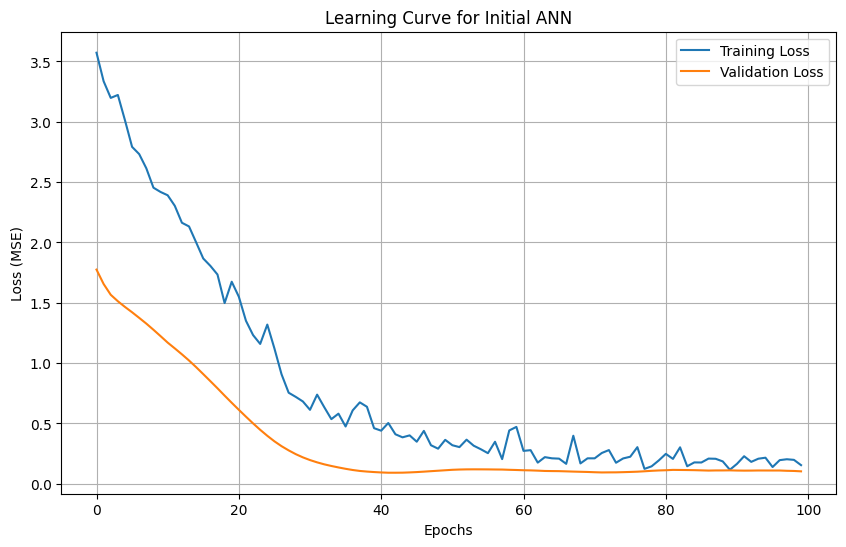

In [347]:
# Plot the learning curve for the best model
def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Learning Curve for Initial ANN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(ann_history)

#### Fine tuned ANN

In [340]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.9 MB/s eta 0:00:00


In [341]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, r2_score

# Define the model building function for Keras Tuner
def build_ann_model(hp):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(hp.Int('units_layer1', min_value=64, max_value=256, step=64), activation='relu'),
        Dropout(hp.Choice('dropout_layer1', values=[0.2, 0.3, 0.4])),
        Dense(hp.Int('units_layer2', min_value=32, max_value=128, step=32), activation='relu'),
        Dropout(hp.Choice('dropout_layer2', values=[0.1, 0.2, 0.3])),
        Dense(hp.Int('units_layer3', min_value=16, max_value=64, step=16), activation='relu'),
        Dense(y_train.shape[1], activation='linear')  # Output layer for regression
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mse',
        metrics=['mse']
    )
    return model

# Initialize Keras Tuner with Random Search
tuner = RandomSearch(
    build_ann_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='ann_fine_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history_best = best_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Tuned ANN - MSE: {mse_best}, R² Score: {r2_best}")


Trial 10 Complete [00h 00m 08s]
val_loss: 0.11603393405675888

Best val_loss So Far: 0.05692606046795845
Total elapsed time: 00h 01m 28s
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.9800 - mse: 2.9800 - val_loss: 1.3946 - val_mse: 1.3946
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.5389 - mse: 2.5389 - val_loss: 1.1717 - val_mse: 1.1717
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.2101 - mse: 2.2101 - val_loss: 0.9929 - val_mse: 0.9929
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.9939 - mse: 1.9939 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.6942 - mse: 1.6942 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.4292 - mse: 1.4292 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.3877 - mse: 1.3877 - val_loss: 0.5604 - val_mse: 0.5604
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Tuned ANN - MSE: 0.09027981758117676, R² Score: 0.6894824504852295


#### Plot the Learning Curve

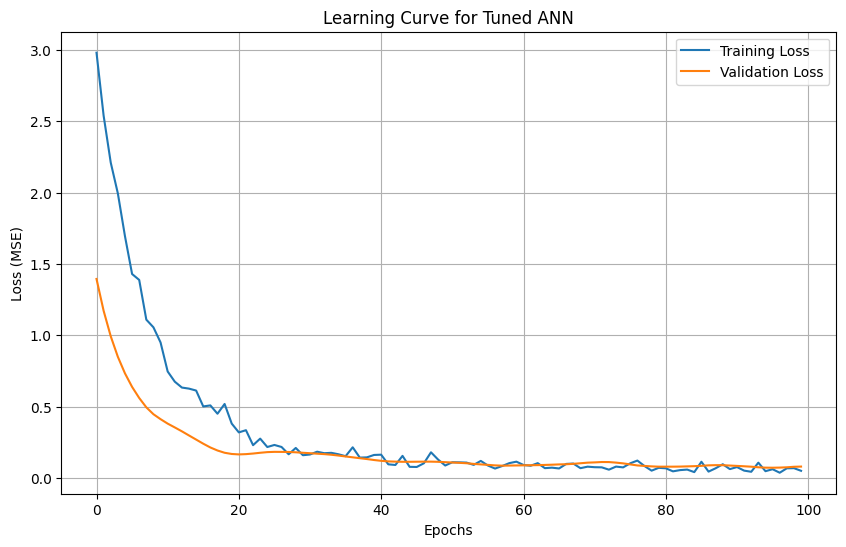

In [348]:
def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Learning Curve for Tuned ANN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot function
plot_learning_curve(history_best)


### Simple RNN

In [353]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, r2_score

# Define the Simple RNN model
def build_simple_rnn(input_shape, output_shape):
    model = Sequential([
        Input(shape=input_shape),
        SimpleRNN(64, activation='relu'),  # RNN Layer
        Dropout(0.2),  # Regularization
        Dense(32, activation='relu'),  # Fully connected layer
        Dropout(0.2),  # Regularization
        Dense(output_shape)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Reshape the input data to include a time dimension
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1]) # Reshape X_train
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1]) # Reshape X_test

# Initialize the model with the reshaped input shape
simple_rnn = build_simple_rnn((X_train_reshaped.shape[1], X_train_reshaped.shape[2]), y_train.shape[1])

# Train the model
history_simple_rnn = simple_rnn.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_mae = simple_rnn.evaluate(X_test_reshaped, y_test)
print(f"Simple RNN - Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predictions and Metrics
rnn_preds = simple_rnn.predict(X_test_reshaped)
mse_rnn = mean_squared_error(y_test, rnn_preds)
r2_rnn = r2_score(y_test, rnn_preds)
print(f"Simple RNN - MSE: {mse_rnn}, R² Score: {r2_rnn}")


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 2.4669 - mae: 1.1433 - val_loss: 1.0895 - val_mae: 0.7895
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.6084 - mae: 1.1410 - val_loss: 1.0210 - val_mae: 0.7594
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.0383 - mae: 1.0843 - val_loss: 0.9538 - val_mae: 0.7283
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.3446 - mae: 1.1496 - val_loss: 0.8885 - val_mae: 0.6968
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.1682 - mae: 1.0840 - val_loss: 0.8264 - val_mae: 0.6673
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.0916 - mae: 1.1105 - val_loss: 0.7672 - val_mae: 0.6383
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.9826 - mae: 1.0013 - val_loss: 0.7127 - val_mae: 0.6133
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.6600 - mae: 0.9470 - val_loss: 0.6600 - val_mae: 0.5880
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.6165 - mae: 0.9486 - va

### Fine-Tuned LSTM Implementation

In [357]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, r2_score

# Define the model for Keras Tuner
def build_lstm_model(hp):
    model = Sequential([
        Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        LSTM(hp.Int('units', min_value=64, max_value=256, step=64), activation='relu', return_sequences=False),
        Dropout(hp.Choice('dropout', values=[0.2, 0.3, 0.4])),
        Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'),
        Dropout(hp.Choice('dense_dropout', values=[0.1, 0.2, 0.3])),
        Dense(y_train.shape[1])  # Output layer
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mse',
        metrics=['mae']
    )
    return model

# Initialize Keras Tuner
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuner_results',
    project_name='lstm_tuning'
)

# Run the tuner
tuner.search(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"LSTM Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Dense Dropout: {best_hps.get('dense_dropout')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build and train the best model
best_lstm_model = tuner.hypermodel.build(best_hps)
history_best_lstm = best_lstm_model.fit(
    X_train_reshaped, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate the best model
test_loss, test_mae = best_lstm_model.evaluate(X_test_reshaped, y_test)
print(f"Tuned LSTM - Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predictions and Metrics
lstm_preds = best_lstm_model.predict(X_test_reshaped)
mse_lstm = mean_squared_error(y_test, lstm_preds)
r2_lstm = r2_score(y_test, lstm_preds)
print(f"Tuned LSTM - MSE: {mse_lstm}, R² Score: {r2_lstm}")


Reloading Tuner from lstm_tuner_results/lstm_tuning/tuner0.json
Best Hyperparameters:
LSTM Units: 128
Dropout: 0.4
Dense Units: 128
Dense Dropout: 0.1
Learning Rate: 0.001
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.7227 - mae: 1.2999 - val_loss: 1.4783 - val_mae: 1.0107
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.6972 - mae: 1.2862 - val_loss: 1.4403 - val_mae: 0.9937
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.6562 - mae: 1.2777 - val_loss: 1.4015 - val_mae: 0.9763
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.5699 - mae: 1.2505 - val_loss: 1.3632 - val_mae: 0.9586
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.5070 - mae: 1.2303 - val_loss: 1.3249 - val_mae: 0.9404
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.4395 - mae: 1.2072 - val_loss: 1.2847 - val_mae: 0.9211
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.3639 - mae: 1.1897 - val_loss: 1.2432 - val_mae: 0.9008
Epoch 8/100
1/1 ━━

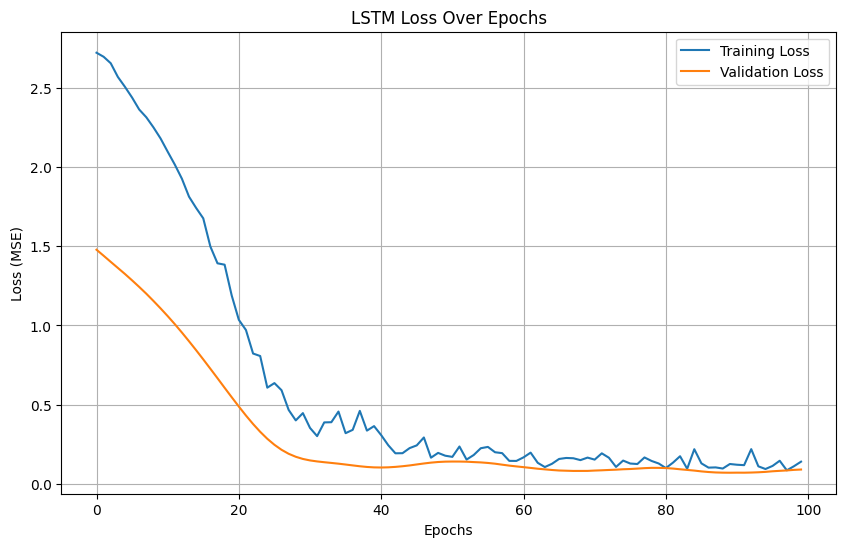

In [358]:
import matplotlib.pyplot as plt

def plot_learning_curve(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the learning curve for LSTM
plot_learning_curve(history_best_lstm, "LSTM Loss Over Epochs")
